In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [3]:
df = pd.read_csv('solar_2.csv',header=0)
df.head()

,coverage,type(n-emitter),material(TeO2),firing(peak),current,sheet resistivity,contact resistivity
0,15.6,1,1,1,1,80,7.30
1,21.7,1,1,1,1,80,5.50
2,4.5,1,0,1,1,70,326.44
3,17.4,1,0,1,1,70,5.37
4,28.8,1,0,1,1,70,0.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   coverage             43 non-null     float64
 1   type(n-emitter)      43 non-null     int64  
 2   material(TeO2)       43 non-null     int64  
 3   firing(peak)         43 non-null     int64  
 4   current              43 non-null     int64  
 5   sheet resistivity    43 non-null     int64  
 6   contact resistivity  43 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 2.5 KB


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['contact resistivity'], axis=1)
y = df['contact resistivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the model on the test set
mse = tpot.score(X_test, y_test)
print('Test set mean squared error: %.3f' % mse)

# Export the best pipeline as Python code
tpot.export('tpot_best_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -42130.670440186645

Generation 2 - Current best internal CV score: -37449.75973612316

Generation 3 - Current best internal CV score: -37449.75973612316

Generation 4 - Current best internal CV score: -37449.75973612316

Generation 5 - Current best internal CV score: -37449.75973612316

Best pipeline: RandomForestRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=5, min_samples_split=18, n_estimators=100)
Test set mean squared error: -33513.434


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


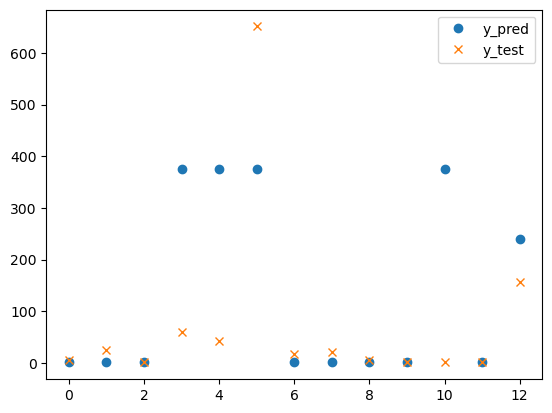

In [19]:
y_pred = tpot.predict(X_test)
y_test = np.array(y_test)

plt.plot(y_pred,'o')
plt.plot(y_test,'x')
plt.legend(['y_pred','y_test'])

In [24]:
X_test.iloc[3:6]

,coverage,type(n-emitter),material(TeO2),firing(peak),current,sheet resistivity
42,26.5,1,0,0,0,90
39,18.7,1,1,0,0,90
21,17.2,1,1,0,1,90


In [28]:
X_test.iloc[10:11]

,coverage,type(n-emitter),material(TeO2),firing(peak),current,sheet resistivity
22,25.5,1,1,0,1,90


In [29]:
X_test.iloc[0:2]

,coverage,type(n-emitter),material(TeO2),firing(peak),current,sheet resistivity
1,21.7,1,1,1,1,80
27,17.9,1,1,1,0,80


In [30]:
X_test.iloc[6:10]

,coverage,type(n-emitter),material(TeO2),firing(peak),current,sheet resistivity
16,16.2,0,0,1,1,145
18,21.2,0,0,1,1,90
3,17.4,1,0,1,1,70
34,34.4,1,1,1,0,80


In [31]:
X_test.iloc[11:12]

,coverage,type(n-emitter),material(TeO2),firing(peak),current,sheet resistivity
35,37.6,1,1,1,0,80


In [32]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize TPOT with desired configuration
tpot = TPOTRegressor(generations=5, population_size=50, cv=kf, verbosity=2, random_state=42)

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Evaluate TPOT on test data
y_pred = tpot.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -41010.62662989854

Generation 2 - Current best internal CV score: -40802.558926910126

Generation 3 - Current best internal CV score: -40234.80317473738

Generation 4 - Current best internal CV score: -40234.80317473738

Generation 5 - Current best internal CV score: -39728.17952465381

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.1, min_samples_leaf=4, min_samples_split=4, n_estimators=100)
Mean Squared Error: 22724.55


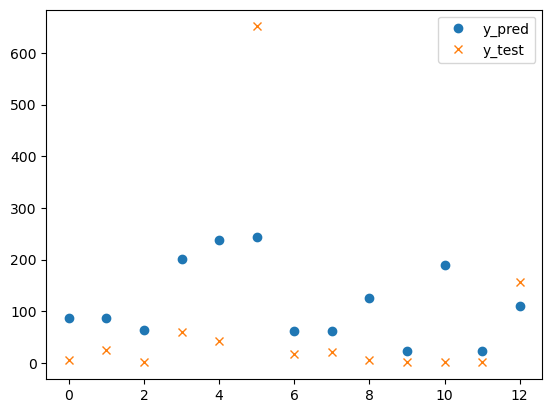

In [33]:
y_pred = tpot.predict(X_test)
y_test = np.array(y_test)

plt.plot(y_pred,'o')
plt.plot(y_test,'x')
plt.legend(['y_pred','y_test'])

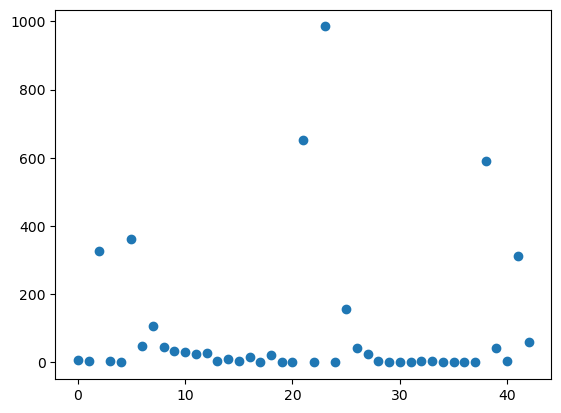

In [35]:
plt.plot(y, 'o')